<div style="font-weight: bold" align="center">
    <div style="font-size: xx-large; color:#3d6f91">Teoría de la Información</div><br>
    <div style="font-size: x-large; color:gray">Análisis spikes neuronales</div><br>
    <div style="font-size: large; color: #5D8AA8">Óscar Gómez Borzdynski y Alejandro Cabana Suárez</div><br></div><hr>
</div>

In [4]:
%%html
<style>
    h1, h2, h3 {color: #3d6f91;}
    b {color: #5D8AA8;}
</style>

# TODO:

* Calcular información mutua para todos los ficheros con resoluciones grandes <b style='color: green'>DONE</b>
* Función transferencia info, que es copiar la de informacion mutua y devolver dividiendo entre la entropia <b style='color: green'>DONE</b>
* Calcular información mutua para todos los ficheros utilizando los bursts como codificación <b style='color: green'>DONE</b>
* Gráficas interspike para explicar los thresholds en get_bursts y en la selección de resoluciones
* Gráficas de una zona de los spikes para explicar los thresholds en get_spikes 
* Gráficas de cada coso para ver cómo queda (Heatmaps, por tamaño de palabra...) 
* Comparar transferencia de información LP->VD frente a VD->LP
* 16 gráficas de transferencia de información (una por tamaño de palabra) con 3 lineas donde cada una corresponden a un fichero <b style='color: orange'>DOING</b>
* Shiftear una serie y medir la mi en función del retraso
* Ver cuántos spikes pillamos sin querer al ampliar la resolucion

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
import pickle
import seaborn as sns

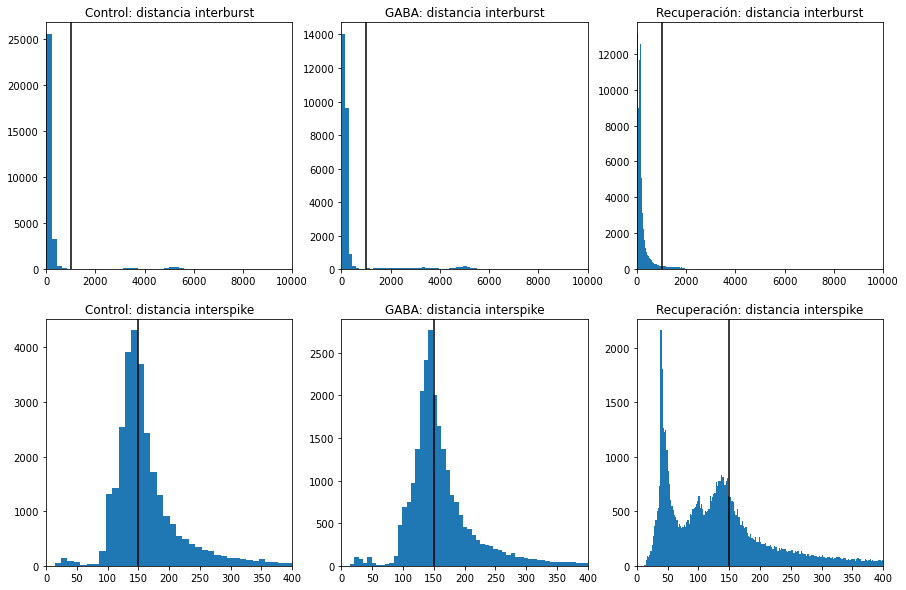

In [63]:
from_files = ["./DatosSinapsisArtificial/TrozoC_bin.csv",
              "./DatosSinapsisArtificial/TrozoG_bin.csv",
              "./DatosSinapsisArtificial/TrozoR_bin.csv"]
titles = ["Control", "GABA", "Recuperación"]
plt.figure(figsize=(15,10))
for i in range(len(from_files)):
    df = pd.read_csv(from_files[i], usecols=['LP_bin'])
    df = df.astype({"LP_bin":'u1'})

    w = df.index[df.LP_bin > 0]
    w = w[1:] - w[:-1]

    plt.subplot(2, 3, i+1)
    plt.hist(w,bins=100)
    plt.axvline(x=1000, color='k')
    plt.xlim((0, 10000))
    plt.title(f"{titles[i]}: distancia interburst")

    plt.subplot(2, 3, i+4)
    plt.hist(w,bins=2000)
    plt.axvline(x=150, color='k')
    plt.xlim((0, 400))
    plt.title(f"{titles[i]}: distancia interspike")

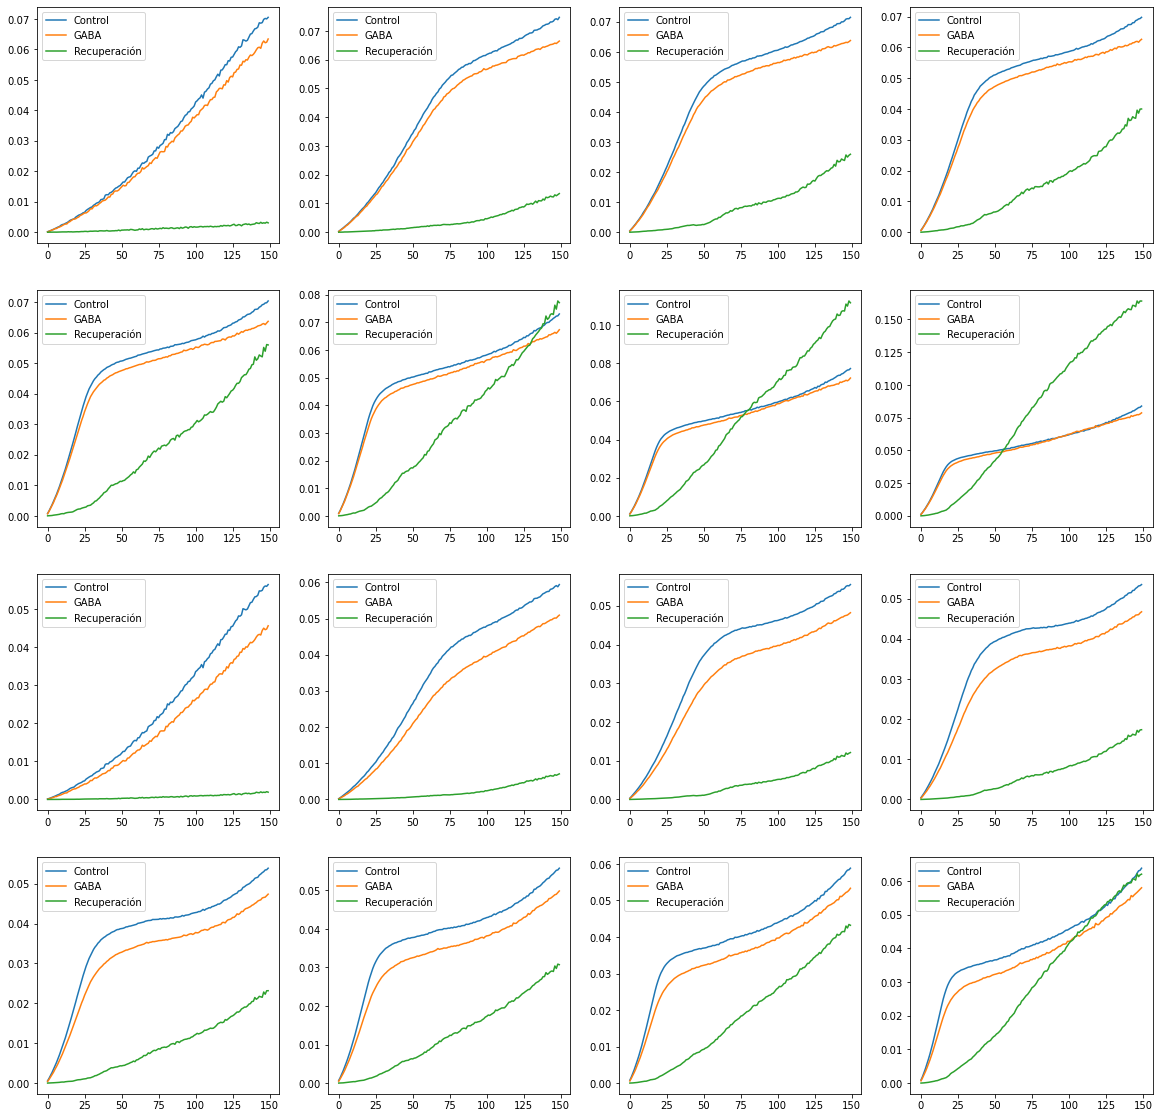

In [50]:
from_files = ["dataC.pkl",
              "dataG.pkl",
              "dataR.pkl"]
labels = ["Control", "GABA", "Recuperación"]
plt.figure(figsize=(20,20))

for w in range(1,9):
    plt.subplot(4, 4, w)
    for i in range(len(from_files)):
        with open(from_files[i], "rb") as f:
            data = pickle.load(f)
            data["transfer_info_col1_col2"].reset_index(drop=True, inplace=True)
            plt.plot(data["transfer_info_col1_col2"][f"word_len {w}"], label=labels[i])
    plt.legend()
    plt.subplot(4, 4, w+8)
    for i in range(len(from_files)):
        with open(from_files[i], "rb") as f:
            data = pickle.load(f)
            data["transfer_info_col2_col1"].reset_index(drop=True, inplace=True)
            plt.plot(data["transfer_info_col2_col1"][f"word_len {w}"], label=labels[i])
    plt.legend()

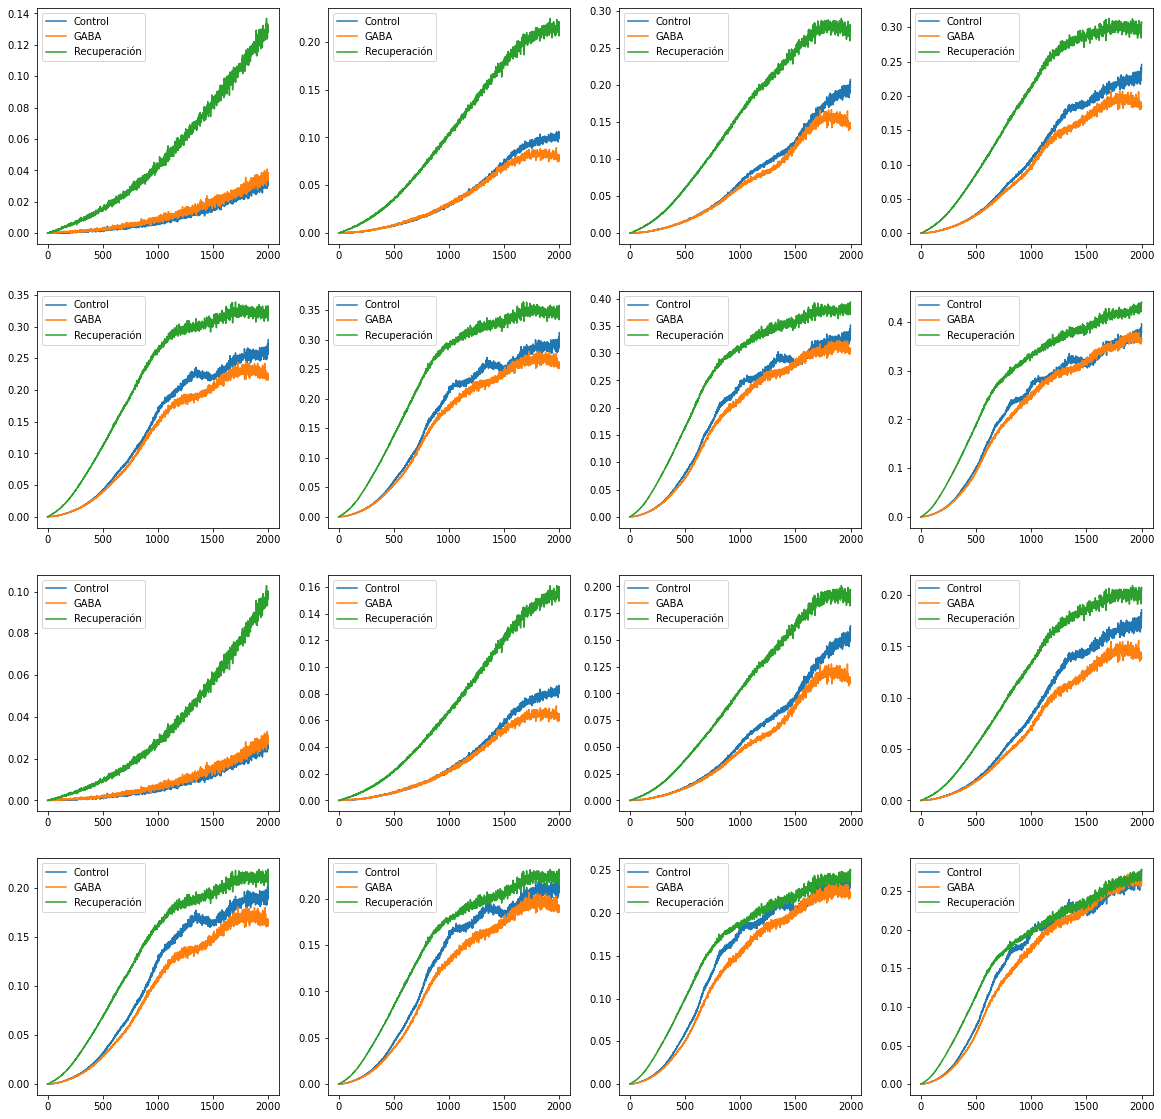

In [51]:
from_files = ["dataC_burst.pkl",
              "dataG_burst.pkl",
              "dataR_burst.pkl"]
labels = ["Control", "GABA", "Recuperación"]
plt.figure(figsize=(20,20))

for w in range(1,9):
    plt.subplot(4, 4, w)
    for i in range(len(from_files)):
        with open(from_files[i], "rb") as f:
            data = pickle.load(f)
            data["transfer_info_col1_col2"].reset_index(drop=True, inplace=True)
            plt.plot(data["transfer_info_col1_col2"][f"word_len {w}"], label=labels[i])
    plt.legend()
    plt.subplot(4, 4, w+8)
    for i in range(len(from_files)):
        with open(from_files[i], "rb") as f:
            data = pickle.load(f)
            data["transfer_info_col2_col1"].reset_index(drop=True, inplace=True)
            plt.plot(data["transfer_info_col2_col1"][f"word_len {w}"], label=labels[i])
    plt.legend()

In [8]:
with open("dataC.pkl", "rb") as f:
    data = pickle.load(f)

In [47]:
with open("dataC_burst.pkl", "rb") as f:
    data = pickle.load(f)

In [48]:
data["transfer_info_col1_col2"]

,word_len 1,word_len 2,word_len 3,word_len 4,word_len 5,word_len 6,word_len 7,word_len 8
resolution 1,1.47332e-05,2.94703e-05,4.42111e-05,6.16962e-05,7.8084e-05,9.57478e-05,0.000112576,0.000128885
resolution 2,3.16138e-05,5.05682e-05,7.79716e-05,0.000101148,0.000122646,0.00016004,0.000195775,0.000224141
resolution 3,4.95345e-05,7.45178e-05,9.94972e-05,0.000165176,0.000210378,0.000257036,0.000304509,0.000357118
resolution 4,8.43165e-07,6.90602e-05,9.66156e-05,0.00012473,0.000155379,0.000187334,0.000221853,0.000264826
resolution 5,5.13634e-06,1.02843e-05,2.56458e-05,3.58946e-05,6.66767e-05,0.00011638,0.000176967,0.000244355
...,...,...,...,...,...,...,...,...
resolution 1996,0.0311053,0.098753,0.190291,0.225819,0.255806,0.286521,0.324507,0.369734
resolution 1997,0.0315616,0.102045,0.200281,0.234947,0.266264,0.297869,0.336484,0.383125
resolution 1998,0.0342809,0.100885,0.195577,0.23166,0.263365,0.294972,0.332963,0.378682
resolution 1999,0.0301588,0.0994459,0.197203,0.233716,0.265394,0.297279,0.3345,0.377656


In [38]:
data[0]

KeyError: 0

<AxesSubplot:>

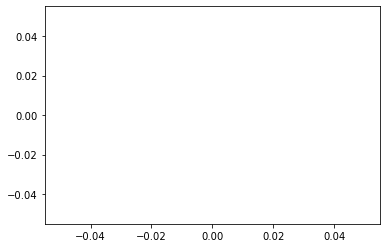

In [28]:
sns.lineplot(np.array(data["mutual_info"]['word_len 2'].convert_dtypes()))

In [33]:
data["mutual_info"].reset_index(drop=True)

,word_len 0,word_len 1,word_len 2,word_len 3,word_len 4,word_len 5,word_len 6,word_len 7
0,2.06148e-06,7.40958e-06,1.77114e-05,3.19026e-05,4.95543e-05,7.14557e-05,9.68727e-05,0.000126173
1,7.85429e-06,3.1142e-05,6.96614e-05,0.000122853,0.000189816,0.000270844,0.000368106,0.000479322
2,1.74121e-05,6.94287e-05,0.000156612,0.000272132,0.000422659,0.000608749,0.000830879,0.00108551
3,3.07528e-05,0.000123814,0.000273134,0.000480229,0.000750985,0.00108671,0.00148332,0.00194133
4,4.69738e-05,0.000194359,0.000425165,0.000753399,0.00118065,0.00170851,0.00234039,0.00307648
...,...,...,...,...,...,...,...,...
145,0.0420932,0.0736974,0.0911916,0.108371,0.128363,0.151678,0.179606,0.214611
146,0.0428507,0.0742137,0.0918878,0.108704,0.128713,0.152595,0.181302,0.216874
147,0.0431704,0.074545,0.0921916,0.109358,0.129599,0.153585,0.182558,0.218935
148,0.0431936,0.0741034,0.0920293,0.109456,0.129682,0.15381,0.1829,0.219677


In [25]:
np.array(data["mutual_info"]['word_len 2'])

array([1.7711440774462184e-05, 6.966143159303773e-05,
       0.00015661216080709028, 0.000273134128193131,
       0.0004251645030886042, 0.0006101233761254266,
       0.0008252209328684645, 0.0010827267491336778,
       0.0013600679525426207, 0.0017134037974101402,
       0.0020674200247243757, 0.002445707844482725, 0.002891716840246472,
       0.003374628383813305, 0.00391592701339849, 0.004482139156230969,
       0.005042061302884315, 0.00563856459173917, 0.006345118729211396,
       0.007106595114675152, 0.007867823735966395, 0.008632088657994252,
       0.009548437258996678, 0.010400801483772426, 0.011380537498129062,
       0.012323557204047653, 0.013395000838961613, 0.01451313386948061,
       0.015577969051745688, 0.016734771681222504, 0.017892613254598677,
       0.019233638532944353, 0.020484179997506846, 0.0216970120420783,
       0.023090429982270066, 0.024359890396790984, 0.02591919733569914,
       0.02713640467984324, 0.02860869503289387, 0.03018909293636529,
       0.031

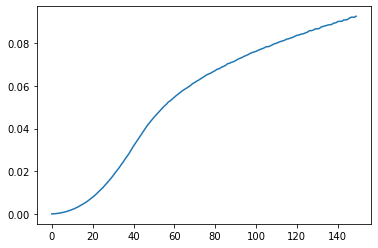

In [34]:
import matplotlib.pyplot as plt
plt.plot(data["mutual_info"].reset_index(drop=True)['word_len 2'])

<AxesSubplot:>

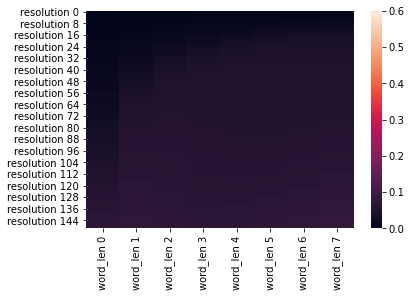

In [34]:
sns.heatmap(data['transfer_info_col1_col2'].convert_dtypes(), vmin=0, vmax=0.6)

<AxesSubplot:>

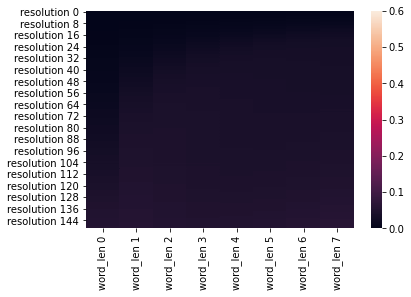

In [35]:
sns.heatmap(data['transfer_info_col2_col1'].convert_dtypes(), vmin=0, vmax=0.6)

In [18]:
data['transfer_info_col1_col2'].convert_dtypes()

,word_len 0,word_len 1,word_len 2,word_len 3,word_len 4,word_len 5,word_len 6,word_len 7
resolution 0,1.473323e-05,0.000029,0.000044,0.000062,0.000078,0.000096,0.000113,0.000129
resolution 1,3.161382e-05,0.000051,0.000078,0.000101,0.000123,0.000160,0.000196,0.000224
resolution 2,4.953448e-05,0.000075,0.000099,0.000165,0.000210,0.000257,0.000305,0.000357
resolution 3,8.431653e-07,0.000069,0.000097,0.000125,0.000155,0.000187,0.000222,0.000265
resolution 4,5.136340e-06,0.000010,0.000026,0.000036,0.000067,0.000116,0.000177,0.000244
...,...,...,...,...,...,...,...,...
resolution 1995,3.110527e-02,0.098753,0.190291,0.225819,0.255806,0.286521,0.324507,0.369734
resolution 1996,3.156160e-02,0.102045,0.200281,0.234947,0.266264,0.297869,0.336484,0.383125
resolution 1997,3.428090e-02,0.100885,0.195577,0.231660,0.263365,0.294972,0.332963,0.378682
resolution 1998,3.015882e-02,0.099446,0.197203,0.233716,0.265394,0.297279,0.334500,0.377656


In [36]:
df = pd.read_csv("./DatosSinapsisArtificial/TrozoC_bin.csv")[['LP_bin', 'VD_bin']]
df = df.astype({"LP_bin":'u1', "VD_bin":'u1'})

In [3]:
df.dtypes

LP_bin    uint8
VD_bin    uint8
dtype: object

In [59]:
with open(data_file, "wb") as f:
    pickle.dump(data, f)

In [60]:
data_file = "dataC.pkl"
try:
    with open(data_file, "rb") as f:
        data = pickle.load(f)
except FileNotFoundError:
    data = np.zeros((14,8))

In [62]:
for i in range(14):
    for j in range(8):
        if data[i][j] != 0:
            print(f"Previamente calculado: resolución={i+1}, ventana={j+1} en la posicion[{i}][{j}], valor={data[i][j]}")
            continue
        print(f"Comienzo cálculo resolución={i+1}, ventana={j+1} en la posicion[{i}][{j}]")
        data[i][j] = mutual_info_optimized(resolution(df, i+1), ['LP_bin', 'VD_bin'], j+1)
        print(f"Calculado: resolución={i+1}, ventana={j+1} en la posicion[{i}][{j}], valor={data[i][j]}")
        with open(data_file, "wb") as f:
            pickle.dump(data, f)

Previamente calculado: resolución=1, ventana=1 en la posicion[0][0], valor=2.0614755821476982e-06
Previamente calculado: resolución=1, ventana=2 en la posicion[0][1], valor=7.4095807517035595e-06
Previamente calculado: resolución=1, ventana=3 en la posicion[0][2], valor=1.7711440774462184e-05
Previamente calculado: resolución=1, ventana=4 en la posicion[0][3], valor=3.1902582232123944e-05
Previamente calculado: resolución=1, ventana=5 en la posicion[0][4], valor=4.955434285208726e-05
Previamente calculado: resolución=1, ventana=6 en la posicion[0][5], valor=7.145569919383976e-05
Previamente calculado: resolución=1, ventana=7 en la posicion[0][6], valor=9.687272837563543e-05
Previamente calculado: resolución=1, ventana=8 en la posicion[0][7], valor=0.00012617250173557748
Previamente calculado: resolución=2, ventana=1 en la posicion[1][0], valor=7.854290998060565e-06
Previamente calculado: resolución=2, ventana=2 en la posicion[1][1], valor=3.114204515242136e-05
Previamente calculado: re

Entropia primera columna: 0.8767567519653664
Entropia segunda columna: 0.6447421538876463
Entropia conjunta: 1.5110776748647492
Calculado: resolución=9, ventana=8 en la posicion[8][7], valor=0.010421230988263641
Comienzo cálculo resolución=10, ventana=1 en la posicion[9][0]
Entropia primera columna: 0.12013238973870273
Entropia segunda columna: 0.08838206651293776
Entropia conjunta: 0.20831357735058048
Calculado: resolución=10, ventana=1 en la posicion[9][0], valor=0.00020087890106001982
Comienzo cálculo resolución=10, ventana=2 en la posicion[9][1]
Entropia primera columna: 0.23989585208493652
Entropia segunda columna: 0.17659437532659064
Entropia conjunta: 0.41573056464054914
Calculado: resolución=10, ventana=2 en la posicion[9][1], valor=0.0007596627709780535
Comienzo cálculo resolución=10, ventana=3 en la posicion[9][2]
Entropia primera columna: 0.3594162910217686
Entropia segunda columna: 0.2646380476959909
Entropia conjunta: 0.6223409349203494
Calculado: resolución=10, ventana=3 

Entropia primera columna: 0.8816903617454656
Entropia segunda columna: 0.6520189389238117
Entropia conjunta: 1.5213662242936805
Calculado: resolución=13, ventana=6 en la posicion[12][5], valor=0.012343076375596729
Comienzo cálculo resolución=13, ventana=7 en la posicion[12][6]
Entropia primera columna: 1.0268690097072544
Entropia segunda columna: 0.7599149071177502
Entropia conjunta: 1.7696563721412826
Calculado: resolución=13, ventana=7 en la posicion[12][6], valor=0.017127544683722018
Comienzo cálculo resolución=13, ventana=8 en la posicion[12][7]
Entropia primera columna: 1.1719491579113732
Entropia segunda columna: 0.8673115563869037
Entropia conjunta: 2.0165881729884094
Calculado: resolución=13, ventana=8 en la posicion[12][7], valor=0.022672541309867622
Comienzo cálculo resolución=14, ventana=1 en la posicion[13][0]
Entropia primera columna: 0.15699870955783224
Entropia segunda columna: 0.11610051595431858
Entropia conjunta: 0.2727379839815017
Calculado: resolución=14, ventana=1 

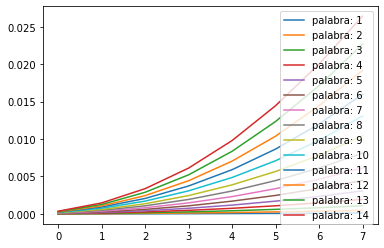

In [63]:
for i in range(14):
    plt.plot(data[i], label=f"resolucion: {i+1}")
    plt.legend()

In [3]:
df = pd.DataFrame(columns=['LP_bin', 'VD_bin'])

In [7]:
df.LP_bin = [0,0,0,0,0,0,0,0,0,0]
df.VD_bin = [0,0,0,0,0,0,0,0,0,0]

In [7]:
mutual_info_optimized(resolution(df, 100), ['LP_bin', 'VD_bin'], 1)

Entropia primera columna: 0.6383522843974425
Entropia segunda columna: 0.5003797555119865
Entropia conjunta: 1.1180052863560763


0.02072675355335285

In [9]:
mutual_info_optimized(resolution(df, 150), ['LP_bin', 'VD_bin'], 1)

Entropia primera columna: 0.7736364504765536
Entropia segunda columna: 0.6185150533286701
Entropia conjunta: 1.348515976071144


0.04363552773407964

In [10]:
df

,Unnamed: 0,LP,VD,LP_bin,VD_bin
0,0,0.004883,0.015259,0,0
1,1,0.001526,0.024109,0,0
2,2,-0.010681,0.031128,0,0
3,3,-0.022278,0.041809,0,0
4,4,-0.028076,0.045471,0,0
...,...,...,...,...,...
19847695,19847695,-0.005798,0.017395,0,0
19847696,19847696,-0.007019,0.024109,0,0
19847697,19847697,-0.000916,0.029602,0,0
19847698,19847698,0.007324,0.039368,0,0


(0.0, 2000.0)

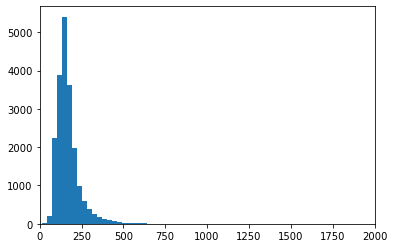

In [37]:
w = df.index[df.VD_bin > 0]
w = w[1:] - w[:-1]
plt.hist(w,bins=1000)
plt.xlim((0, 2000))

In [17]:
w

Int64Index([  97,  111,  130,  133,  135,  125,  156,  147,  132,  186,
            ...
             200,  214,  227,  500, 4951,  111,  154,  171,  178,  359],
           dtype='int64', length=32352)

In [ ]:
w = df.index[df.LP_bin > 0]

In [18]:
pd.Series(w).reindex()

0         97
1        111
2        130
3        133
4        135
        ... 
32347    111
32348    154
32349    171
32350    178
32351    359
Length: 32352, dtype: int64

In [38]:
threshold = 1000
w = df.index[df.LP_bin > 0]
w = (w[1:] - w[:-1]).to_list()
w.insert(0, np.inf)
df["distance"] = 0
df.loc[df.LP_bin > 0, "distance"] = w
df["LP2_bin"] = 0
df.loc[df.distance > threshold, "LP2_bin"] = 1

w = df.index[df.VD_bin > 0]
w = (w[1:] - w[:-1]).to_list()
w.insert(0, np.inf)
df["distance"] = 0
df.loc[df.VD_bin > 0, "distance"] = w
df["VD2_bin"] = 0
df.loc[df.distance > threshold, "VD2_bin"] = 1

In [40]:
df["VD2_bin"].sum()

1960

In [ ]:

df2 = get_bursts(df, 1000, ["LP_bin", "VD_bin"], ["LP_burst", "VD_burst"])


In [27]:
len(df.loc[df.LP_bin > 0, "distance"])

32353

In [32]:
df[df.LP_bin > 0]

,LP_bin,VD_bin,joined,distance
2878,1,0,1000,inf
2975,1,0,1000,97.0
3086,1,0,1000,111.0
3216,1,0,1000,130.0
3349,1,0,1000,133.0
...,...,...,...,...
19843981,1,0,1000,111.0
19844135,1,0,1000,154.0
19844306,1,0,1000,171.0
19844484,1,0,1000,178.0


In [29]:
w

Int64Index([  97,  111,  130,  133,  135,  125,  156,  147,  132,  186,
            ...
             200,  214,  227,  500, 4951,  111,  154,  171,  178,  359],
           dtype='int64', length=32352)

In [15]:
transfer_info(resolution(df,100), ['LP_bin', 'VD_bin'], 4)

Entropia primera columna: 2.02324110933116
Entropia segunda columna: 1.5134710660487392
Entropia conjunta: 3.4481154575867468


([0.043789500610948426, 0.05853875887066326],
 0.08859671779315281,
 [2.02324110933116, 1.5134710660487392],
 3.4481154575867468)

In [11]:
a = [1,2]

In [12]:
reversed(a)

In [13]:
for i in reversed(a):
    print(i)

2
1


In [23]:
a.insert(0,np.inf)

In [24]:
a

[inf, 10000, 1, 2]

In [6]:
col_names = [f"word_len {i}" for i in range(10)]
row_names = [f"resolution {i}" for i in range(10)]
data = {
    "transfer_info_col1_col2" : pd.DataFrame(columns = col_names, index = row_names),
    "mutual_info" : pd.DataFrame(columns = col_names, index = row_names),
    "col1_entropy" : pd.DataFrame(columns = col_names, index = row_names),
    "col2_entropy" : pd.DataFrame(columns = col_names, index = row_names),
    "joined_entropy" : pd.DataFrame(columns = col_names, index = row_names)
}
data["transfer_info_col1_col2"][:] = 0

In [7]:
data

{'transfer_info_col1_col2':              word_len 0 word_len 1 word_len 2 word_len 3 word_len 4  \
 resolution 0          0          0          0          0          0   
 resolution 1          0          0          0          0          0   
 resolution 2          0          0          0          0          0   
 resolution 3          0          0          0          0          0   
 resolution 4          0          0          0          0          0   
 resolution 5          0          0          0          0          0   
 resolution 6          0          0          0          0          0   
 resolution 7          0          0          0          0          0   
 resolution 8          0          0          0          0          0   
 resolution 9          0          0          0          0          0   
 
              word_len 5 word_len 6 word_len 7 word_len 8 word_len 9  
 resolution 0          0          0          0          0          0  
 resolution 1          0          0  